In [1]:
import pandas as pd
Predictdiabetes_df = pd.read_csv(r"D:\sam_py_course\PredictDiabetes\diabetes.csv")

In [2]:
Predictdiabetes_df.shape

(768, 9)

In [3]:
Predictdiabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Target Variable

In [5]:
Predictdiabetes_df['Outcome'].nunique()

2

## Drop Duplicates

In [4]:
Predictdiabetes_df.duplicated().sum()

0

## Missing values

In [6]:
Predictdiabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

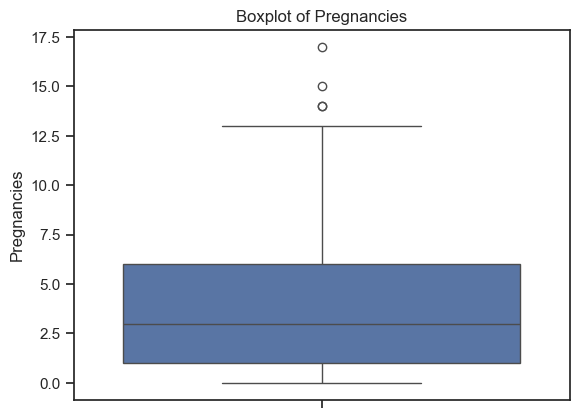

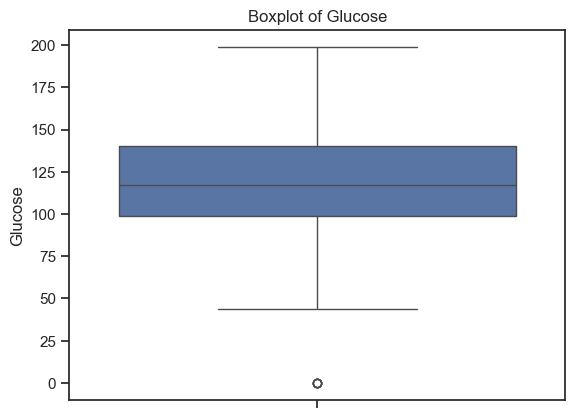

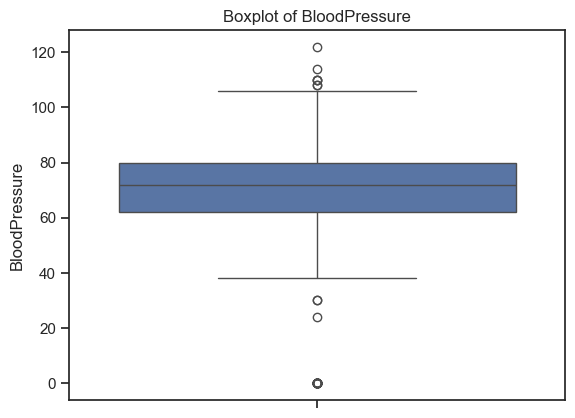

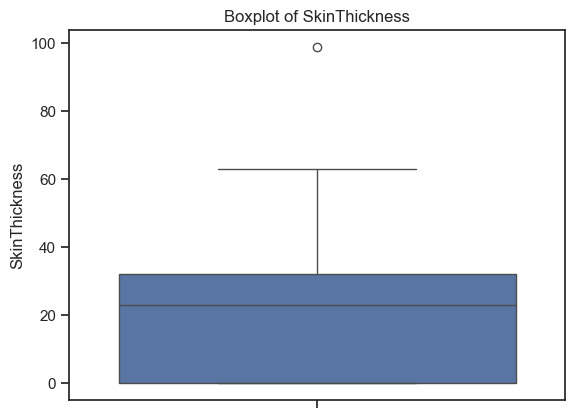

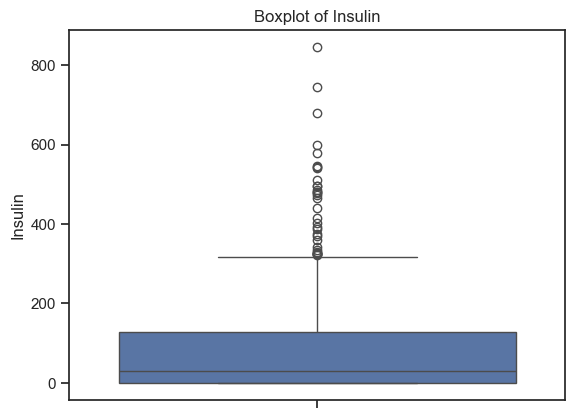

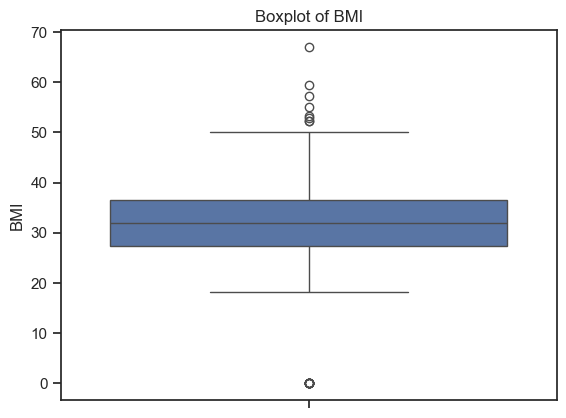

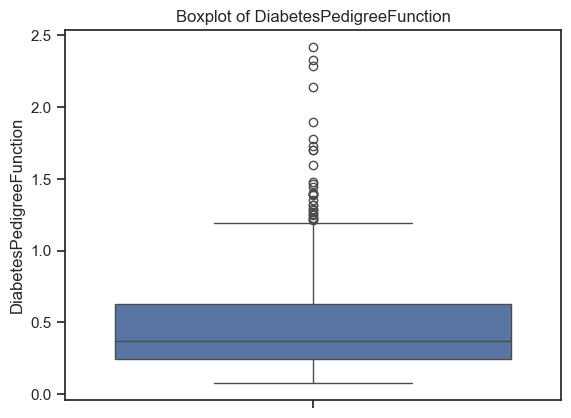

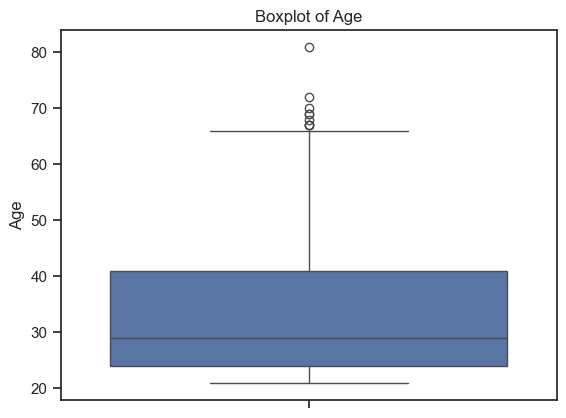

In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
sns.set(style= 'ticks')

for col in numeric_cols:
    sns.boxplot(y=Predictdiabetes_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [8]:
Predictdiabetes_df['SkinThickness'].sort_values(ascending = True)

686     0
201     0
683     0
578     0
207     0
       ..
86     54
120    56
57     60
445    63
579    99
Name: SkinThickness, Length: 768, dtype: int64

In [9]:
Predictdiabetes_df[Predictdiabetes_df['SkinThickness']==99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [10]:
Predictdiabetesnew_df= Predictdiabetes_df.drop([579],axis=0).reset_index(drop = True)

In [11]:
Predictdiabetesnew_df[Predictdiabetesnew_df['SkinThickness']==99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Model Building

In [12]:
Predictdiabetesnew_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data = Predictdiabetesnew_df.copy()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [16]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.434159,79.903520,31.989048,0.471742,33.203390,0.348110
std,3.371117,31.874936,19.368410,15.708524,115.283105,7.888698,0.331524,11.721879,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
scaling_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

data[scaling_columns] = scaler.fit_transform(data[scaling_columns])

In [24]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.638942,0.854039,0.149604,0.927862,-0.693559,0.204343,0.468622,1.433863,1
1,-0.845214,-1.123725,-0.160381,0.545655,-0.693559,-0.683581,-0.364440,-0.188095,0


In [25]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Acuuracy:", accuracy_score(y_test,y_pred))
print("Report:\n", classification_report(y_test,y_pred))

Acuuracy: 0.7857142857142857
Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       104
           1       0.68      0.64      0.66        50

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154

